## Here we explore the MNIST dataset and classification algorithms

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [2]:
X, y = mnist["data"], mnist['target']

In [3]:
X.shape

(70000, 784)

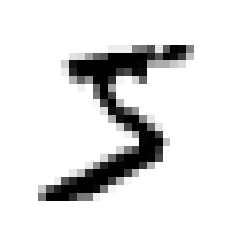

5


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

digit = X[0]
dm = digit.reshape(28,28)

plt.imshow(dm,cmap='binary')
plt.axis('off')
plt.show()
print(y[0])

In [5]:
import numpy as np
y = y.astype(np.uint8)

In [128]:
Nsplit = 60000
X_train, X_test, y_train, y_test = X[:Nsplit], X[Nsplit:], y[:Nsplit], y[Nsplit:]

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([digit])

array([ True])

In [11]:
p = sgd_clf.predict(X_test)
n_correct = sum(p==y_test_5)
print('Percent correct = {:4.2f}%'.format(100*n_correct/len(y_test)))

Percent correct = 94.92%


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [14]:
y_train_pred.shape

(60000,)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [16]:
# Classifier precision
prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
print([prec,recall])

[0.8370879772350012, 0.6511713705958311]


In [17]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [18]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [19]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

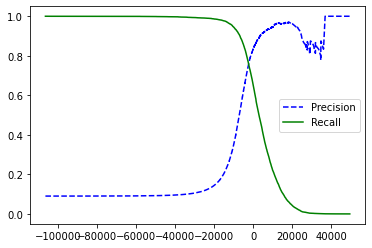

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-',label='Recall')
    plt.legend()

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

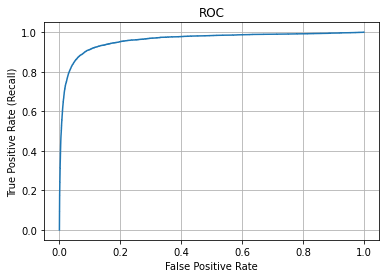

In [22]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.grid()

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

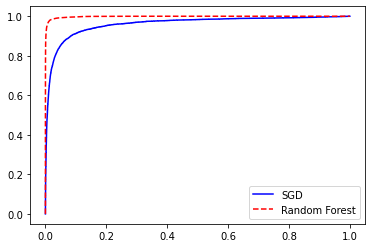

In [24]:
plt.plot(fpr, tpr, "b", label='SGD')
plt.plot(fpr_forest, tpr_forest, "r--",label="Random Forest")
plt.legend()
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()

from sklearn.model_selection import cross_val_score
cross_val_score(KN, X_train, y_train_5, cv=3, scoring="accuracy")


KeyboardInterrupt: 

In [26]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([digit])

array([5], dtype=uint8)

In [27]:
digit_scores = svm_clf.decision_function([digit])
print(digit_scores)

[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

TypeError: fit_transform() missing 1 required positional argument: 'X'

## Try an exercise
rotate and tranform dataset to improve score

In [155]:
# BASELINE (12 sec to run)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.linear_model import SGDClassifier

# Make classifier object
#sgd_clf = SGDClassifier(random_state=42)
#sgd_clf = KNeighborsClassifier()
sgd_clf = RandomForestClassifier(random_state=42)

# Train
start_time = time.time()
sgd_clf.fit(X_train,y_train_5)
end_time = time.time()
print('Time elapsed: {:4.1f} seconds'.format(end_time-start_time))

# Predict test set
y_test_5_predict = sgd_clf.predict(X_test)

# Evalute precision/recall
from sklearn.metrics import precision_score, recall_score
ps = precision_score(y_test_5,y_test_5_predict)
rs = recall_score(y_test_5,y_test_5_predict)
print([ps, rs])


Time elapsed: 35.9 seconds


KeyboardInterrupt: 

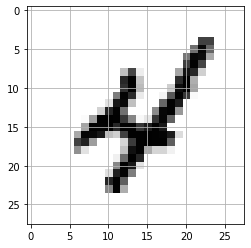

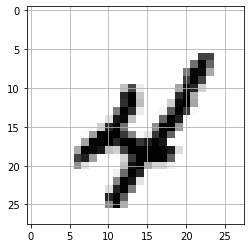

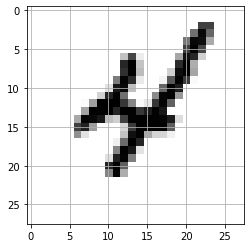

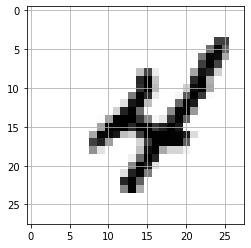

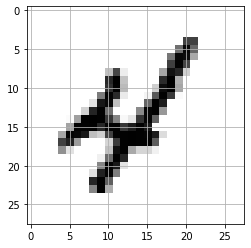

In [154]:
# Expand dataset
roll = 2

def my_roll(x,roll,ax):
    Nx = x.shape
    x = np.reshape(x,(Nx[0],28,28))
    x = np.roll(x,roll,axis=ax)
    if roll > 0:
        if ax == 1:
            x[:,:roll,:] = 0
        elif ax == 2:
            x[:,:,:roll] = 0
    else:
        if ax == 1:
            x[:,roll:,:] = 0
        elif ax == 2:
            x[:,:,roll:] = 0                
    x = np.reshape(x,(Nx[0],784))
    return x

X_train_a = my_roll(X_train.copy(),roll,1)
X_train_b = my_roll(X_train.copy(),-roll,1)
X_train_c = my_roll(X_train.copy(),roll,2)
X_train_d = my_roll(X_train.copy(),-roll,2)

X_train_exp = np.concatenate((X_train,X_train_a,X_train_b,X_train_c,X_train_d),0)
y_train_5_exp = np.tile(y_train_5,5)

def print_digit(digit):        
    dm = digit.reshape(28,28)
    plt.imshow(dm,cmap='binary')
    #plt.axis('off')
    plt.grid()
    plt.show()

pick = 9    
print_digit(X_train_exp[pick])
print_digit(X_train_exp[pick+1*60000])
print_digit(X_train_exp[pick+2*60000])
print_digit(X_train_exp[pick+3*60000])
print_digit(X_train_exp[pick+4*60000])


In [143]:
# Train
start_time = time.time()
sgd_clf.fit(X_train_exp,y_train_5_exp)
end_time = time.time()
print('Time elapsed: {:4.1f} seconds'.format(end_time-start_time))

# Predict test set
y_test_5_predict = sgd_clf.predict(X_test)

# Evalute precision/recall
from sklearn.metrics import precision_score, recall_score
ps = precision_score(y_test_5,y_test_5_predict)
rs = recall_score(y_test_5,y_test_5_predict)
print([ps, rs])

Time elapsed: 261.4 seconds
[0.6029929577464789, 0.7679372197309418]


WHAT? IT's worse with the rolled data

In [145]:
# What about with just one of the rolled sets
# Train
start_time = time.time()
sgd_clf.fit(X_train_a,y_train_5)
end_time = time.time()
print('Time elapsed: {:4.1f} seconds'.format(end_time-start_time))

# Predict test set
y_test_5_predict = sgd_clf.predict(X_test)

# Evalute precision/recall
from sklearn.metrics import precision_score, recall_score
ps = precision_score(y_test_5,y_test_5_predict)
rs = recall_score(y_test_5,y_test_5_predict)
print([ps, rs])

Time elapsed: 16.4 seconds
[0.7436893203883496, 0.42937219730941706]


Seems like shifting around is not so goood

Let's try rotating instead

In [133]:
start_time = time.time()
y_scores = cross_val_predict(sgd_clf, X_train_exp, y_train_5_exp, cv=2, method='decision_function')
end_time = time.time()
print('Time elapsed: {:4.1f} seconds'.format(end_time-start_time))

Time elapsed: 150.9 seconds


In [ ]:
from sklearn.metrics import precision_score, recall_score
y_train_pred = 
precision_score(y_train_5,y_train_pred)


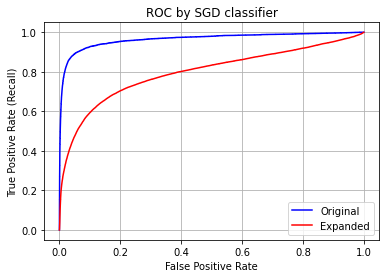

In [134]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5_exp, y_scores)
fpr_exp, tpr_exp, thresholds = roc_curve(y_train_5_exp,y_scores)

plt.plot(fpr, tpr, "b", label='Original')
plt.plot(fpr_exp, tpr_exp, "r", label='Expanded')
plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate')
plt.title('ROC by SGD classifier')
plt.grid()
plt.legend()

Visualizing the roll

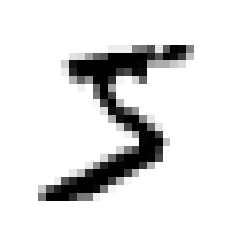

5


In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt

digit = X[0]
dm = digit.reshape(28,28)
dm = np.roll(dm,0,axis=1)

plt.imshow(dm,cmap='binary')
plt.axis('off')
plt.show()
print(y[0])

In [100]:
a = np.arange(5)+1
roll = -2
a = np.roll(a,roll)
a[roll:] = 0
np.tile(a,2)

array([3, 4, 5, 0, 0, 3, 4, 5, 0, 0])

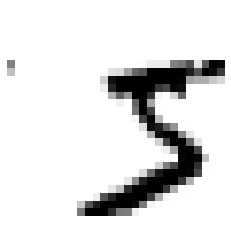

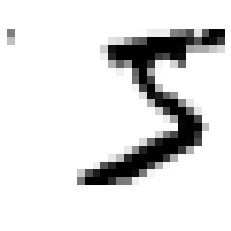

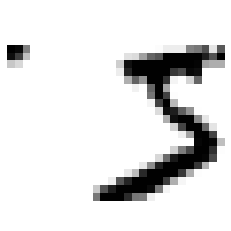

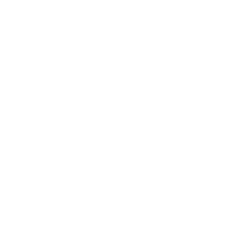

In [119]:
zx

In [111]:
y_train_5_exp[60000]

True

In [112]:
Nx

(60000, 784)